A* Tree Planner Demo Notebook

In [1]:
# ============================================================================
# CELL 1: Imports
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime as dt

from env.balloon_env import BalloonERAEnvironment
from agent.tree_search_agent import run_astar

# For visualization
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Configuration parameters
windfield_noise = False  # Add noise to the wind field
use_simplified_step = True  # Use simplified step for A* search

In [3]:
# ============================================================================
# CELL 2: Demo Setup
# ============================================================================

# Demo Setup
# Ithaca to TODO, no noise in wind field.
np.random.seed(0)  # For reproducible results

# BalloonERAEnvironment initialization 
# 1. load your ERA5 file
ds = xr.open_dataset("era5_data.nc", engine="netcdf4")
# 2. pick a reference start_time (should match your dataset’s first valid_time)
start_time = dt.datetime(2024, 7, 1, 0, 0)
# Create environment and agent
env = BalloonERAEnvironment(ds=ds, start_time=start_time, viz=False, add_noise=windfield_noise)


In [ ]:
# Define start and target states

# Working start state.
start_state = np.array([0.0, 0.0, 10.0])  # lat, lon, alt
# Working target state with windfield_noise=True (works with and without simplified step)
# target_state = np.array([-0.0001, 0.04, 10.0])  # lat, lon, alt
# Working target state with windfield_noise=True (works with simplified step)
target_state = np.array([-0.0001, 0.035, 10.0])  # lat, lon, alt

print(f"Start State:  Lat={start_state[0]:.3f}, Lon={start_state[1]:.3f}, Alt={start_state[2]:.1f} km")
print(f"Target State: Lat={target_state[0]:.3f}, Lon={target_state[1]:.3f}, Alt={target_state[2]:.1f} km")


Start State:  Lat=0.000, Lon=0.000, Alt=10.0 km
Target State: Lat=-0.000, Lon=0.035, Alt=10.0 km


=== Tree Search (A*) Demo ===
Searching for optimal path...
Iteration 1/1000
Iteration 2/1000
Iteration 3/1000
Iteration 4/1000
Iteration 5/1000
Iteration 6/1000
Iteration 7/1000
Iteration 8/1000
Iteration 9/1000
Iteration 10/1000
Iteration 11/1000
Iteration 12/1000
Iteration 13/1000
Iteration 14/1000
Iteration 15/1000
Iteration 16/1000
Iteration 17/1000
Iteration 18/1000
Iteration 19/1000
Iteration 20/1000
Iteration 21/1000
Iteration 22/1000
Iteration 23/1000
Iteration 24/1000
Iteration 25/1000
Iteration 26/1000
Iteration 27/1000
Iteration 28/1000
Iteration 29/1000
Iteration 30/1000
Iteration 31/1000
Iteration 32/1000
Iteration 33/1000
Iteration 34/1000
Iteration 35/1000
Iteration 36/1000
Iteration 37/1000
Iteration 38/1000
Iteration 39/1000
Iteration 40/1000
Iteration 41/1000
Iteration 42/1000
Iteration 43/1000
Iteration 44/1000
Iteration 45/1000
Iteration 46/1000
Iteration 47/1000
Iteration 48/1000
Iteration 49/1000
Iteration 50/1000
Iteration 51/1000
Iteration 52/1000
Iteration 53/

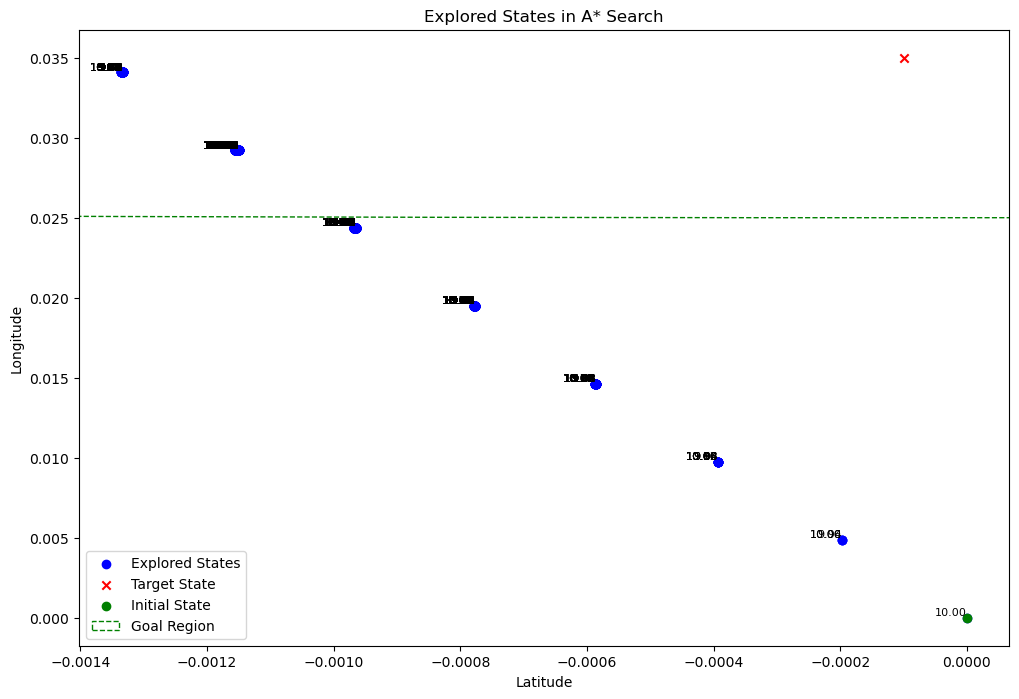

Action sequence to target: [((np.float64(0.0), np.float64(0.0), np.float64(10.0), np.float64(0.0)), 'descend'), ((np.float64(-0.0001976677370201393), np.float64(0.004879664252189283), np.float64(9.94), np.float64(0.016666666666666666)), 'descend'), ((np.float64(-0.00039286660326657733), np.float64(0.009756665314622603), np.float64(9.879999999999999), np.float64(0.03333333333333333)), 'descend'), ((np.float64(-0.0005856150686496624), np.float64(0.014631006576155146), np.float64(9.819999999999999), np.float64(0.05)), 'ascend'), ((np.float64(-0.0007759316390506307), np.float64(0.01950269139397475), np.float64(9.879999999999999), np.float64(0.06666666666666667)), 'ascend'), ((np.float64(-0.0009642908694775987), np.float64(0.02437129424795704), np.float64(9.94), np.float64(0.08333333333333333)), 'ascend'), ((np.float64(-0.001150712711544109), np.float64(0.029236816798395838), np.float64(10.0), np.float64(0.09999999999999999)), None)]
Found path with 7 steps
Path:
  Step 0: Lat=0.000, Lon=0.

<Figure size 1200x800 with 0 Axes>

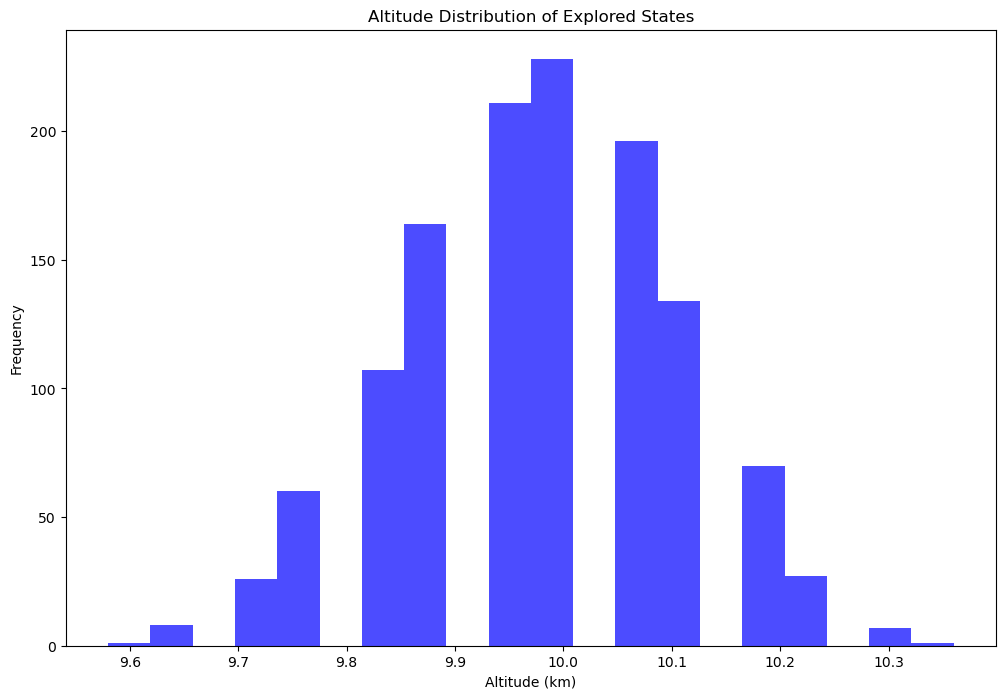

In [5]:
# ============================================================================
# CELL 9: Tree Search Demo
# ============================================================================

# Tree Search Demo
print("=== Tree Search (A*) Demo ===")

# Find optimal path
print("Searching for optimal path...")
optimal_path = run_astar(env, initial_lat=start_state[0], initial_long=start_state[1], initial_alt=start_state[2],
            target_lat=target_state[0], target_lon=target_state[1], target_alt=target_state[2],
            distance='haversine', heuristic='haversine',
            plot_suffix="test_era_notebook", simplified_step=use_simplified_step)

if optimal_path:
    print(f"Found path with {len(optimal_path)} steps")
    print("Path:")
    for i, state in enumerate(optimal_path):
        print(f"  Step {i}: Lat={state[0][0]:.3f}, Lon={state[0][1]:.3f}, Alt={state[0][2]:.1f} km")
else:
    print("No path found within iteration limit")